This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** October 2024
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the test-suite for the FIXED-boundary plasma equilibrium problem where the plasma current is modelled using a NONLINEAR function. Such case yields an *analytical solution*, an therefore the exact numerical error can be computed and used for code validation. 

After selecting the MESH, the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

READ INPUT FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...     -> READ EQUILI DATA FILE...Done!
Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE VACUUM VESSEL FIRST WALL...Done!
     -> APPROXIMATE PLASMA/VACUUM INTERFACE...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> INITIALISE UNKNOWN VECTORS AND COMPUTE INITIAL GUESS...
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
     Done!
Done!


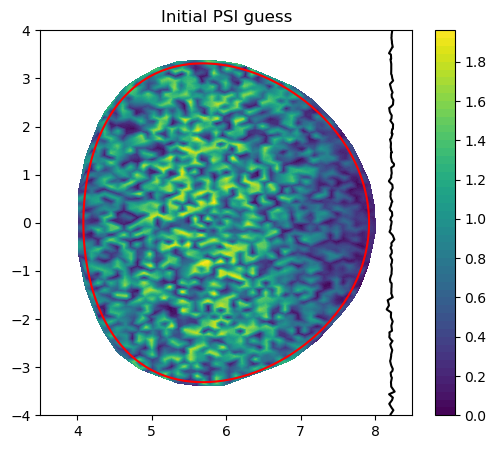

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [5.60116532 0.30615075]  (ELEMENT  6345 ) WITH VALUE PSI_0 =  [1.01302066]


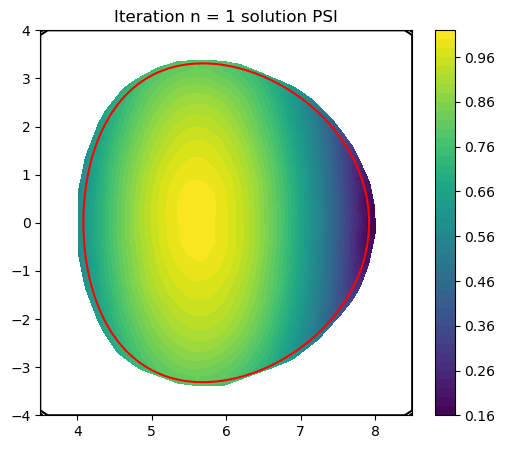

Internal iteration =  1 , PSI_NORM residu =  0.6801878105753217
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [5.6083547  0.00700474]  (ELEMENT  6445 ) WITH VALUE PSI_0 =  [1.02932745]


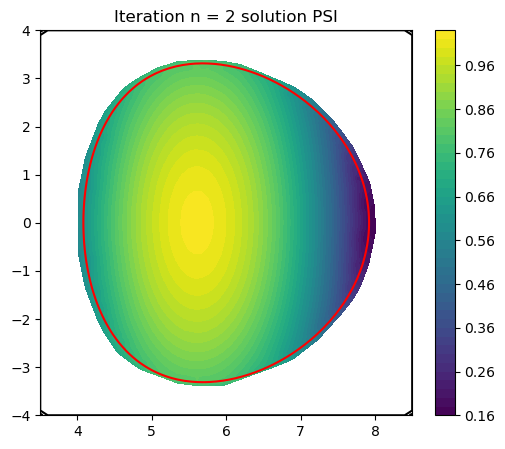

Internal iteration =  2 , PSI_NORM residu =  0.01019338210031821
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [ 5.61178181e+00 -2.59487364e-04]  (ELEMENT  6445 ) WITH VALUE PSI_0 =  [1.03491136]


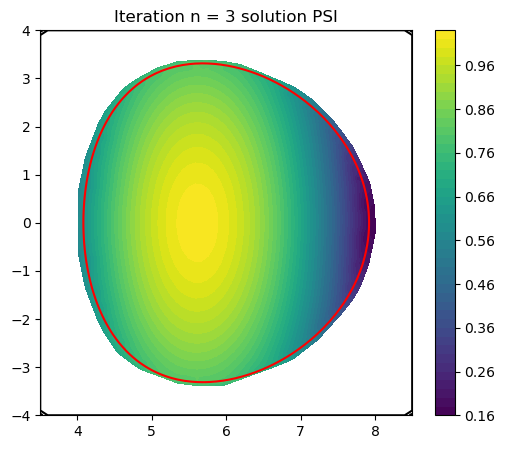

Internal iteration =  3 , PSI_NORM residu =  0.0033226583656429894
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [ 5.61325601e+00 -9.90819162e-04]  (ELEMENT  6444 ) WITH VALUE PSI_0 =  [1.03674881]


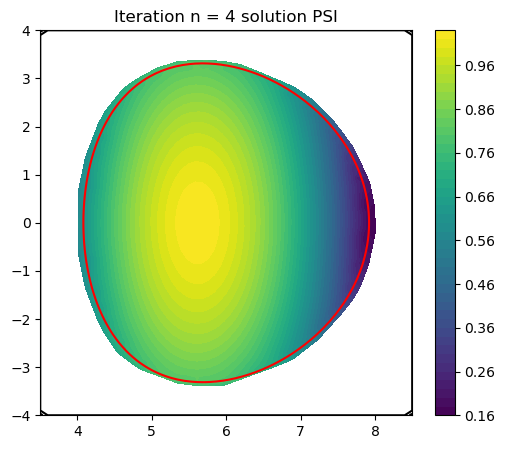

Internal iteration =  4 , PSI_NORM residu =  0.0011187014479538022
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [ 5.61378411e+00 -1.07721929e-03]  (ELEMENT  6444 ) WITH VALUE PSI_0 =  [1.03736014]


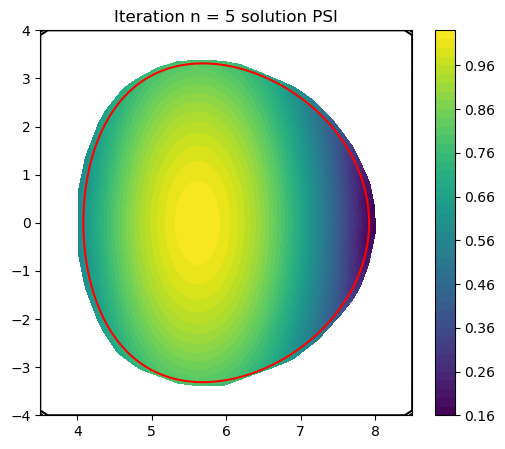

Internal iteration =  5 , PSI_NORM residu =  0.00037623705058398906
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [ 5.61396480e+00 -1.08665687e-03]  (ELEMENT  6444 ) WITH VALUE PSI_0 =  [1.03756496]


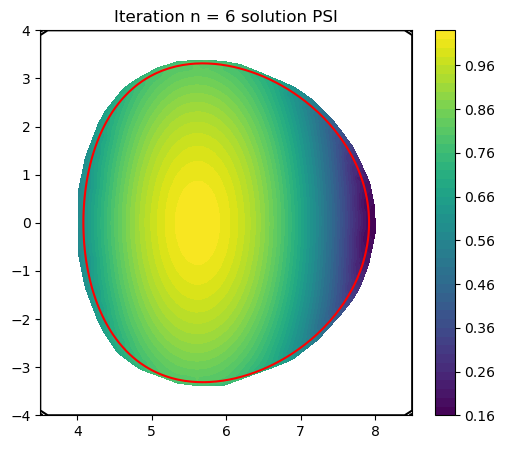

Internal iteration =  6 , PSI_NORM residu =  0.0001264444081749058
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
LOCAL EXTREMUM AT  [ 5.61402585e+00 -1.08694054e-03]  (ELEMENT  6444 ) WITH VALUE PSI_0 =  [1.03763371]


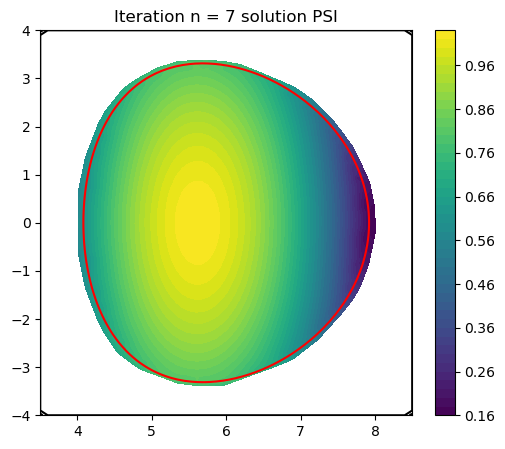

Internal iteration =  7 , PSI_NORM residu =  4.248461162345333e-05
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.0
 
SOLUTION CONVERGED


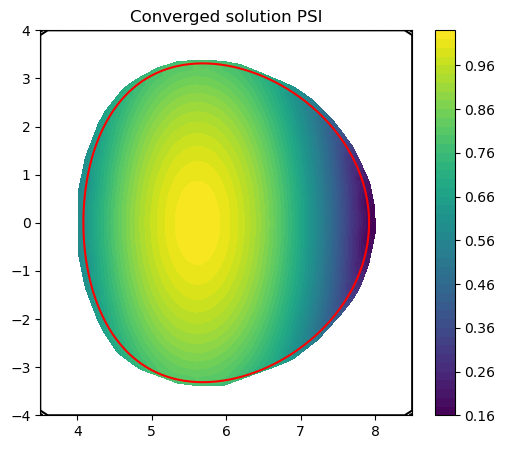

In [1]:
import sys
sys.path.append('../')

from src.GradShafranovCutFEM import *

### SELECT MESH 
MESH = 'TS-CUTFEM-TRI03-FINE-REDUCED'
#MESH = 'TS-CUTFEM-TRI06-FINE-REDUCED'
#MESH = 'TS-CUTFEM-TRI10-LOW-REDUCED'
#MESH = 'TS-CUTFEM-QUA04-FINE-REDUCED'
#MESH = 'TS-CUTFEM-QUA09-FINE-REDUCED'

CASE = 'TS-FIXED-1W-NONLINEAR'   

##############################################################
##############################################################

## CREATE GRAD-SHAFRANOV PROBLEM 
Problem = GradShafranovCutFEM(MESH,CASE)
## DECLARE OUTPUT SWITCHS:
##### OUTPUT PLOTS IN RUNTIME
Problem.plotElemsClassi_output = False        # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI_output = True                 # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.PARAMS_output = True                  # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.PSI_output = True                     # OUTPUT SWITCH FOR PSI FIELD VALUES OBTAINED BY SOLVING THE CutFEM SYSTEM
Problem.PSIcrit_output = False                # OUTPUT SWITCH FOR CRITICAL PSI VALUES
Problem.PSI_NORM_output = False               # OUTPUT SWITCH FOR THE PSI_NORM FIELD VALUES (AFTER NORMALISATION OF PSI FIELD)
Problem.PSI_B_output = False                  # OUTPUT SWITCH FOR PSI_B BOUNDARY VALUES
Problem.RESIDU_output = True                  # OUTPUT SWITCH FOR RESIDU FOR EACH ITERATION
Problem.ElementsClassi_output = False         # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.PlasmaLevSetVals_output = False       # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.VacVessLevSetVals_output = False      # OUTPUT SWITCH FOR VACUUM VESSEL BOUNDARY LEVEL-SET FIELD VALUES
Problem.L2error_output = True                 # OUTPUT SWITCH FOR ERROR FIELD AND THE L2 ERROR NORM FOR THE CONVERGED SOLUTION 
Problem.ELMAT_output = False                  # OUTPUT SWITCH FOR ELEMENTAL MATRICES

##############################################################
##############################################################

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI()